# Dependency Grammars with NLTK

- Evgeny A. Stepanov
- stapanov.evgeny.a@gmail.com

*Notebook Covers Material of*:
- [NLTK](https://www.nltk.org/book/ch08.html) Chapter 8: Analyzing Sentence Structure
- Chapter 14: Dependency Parsing of Dan Jurafsky and James H. Martin's Speech and Language Processing (3rd ed. draft)
- Kübler, McDonald, and Nivre (2009) Dependency Parsing. 


__Requirements__

- [NLTK](https://www.nltk.org/)
    - run `pip install nltk`
- [spaCy](https://spacy.io/)
    - run `pip install spacy`
    - run `python -m spacy download en_core_web_sm` to install English models
- [stanza](https://stanfordnlp.github.io/stanza/) for Stanford Parser
    - run `pip install stanza`
    - run `stanza.download('en')` to intall English models
    

## Dependency Grammars

Unlike Constituency (Phrase Structure) Grammar that addresses how words and sequences of words combine to form constituents, Dependency Grammar addresses on how words relate to each other. 

Dependency Grammar assumes that syntactic structure consists of words linked by binary, asymmetrical relations called __dependency relations__. A dependency relation is a binary asymmetric relation that holds between a syntactically subordinate word, called the __dependent__, and another word on which it depends, called the __head__.

The __head of a sentence__ is usually taken to be the tensed verb, and every other word is either dependent on the sentence head, or connects to it through a path of dependencies. Thus, a dependency parse is a __directed graph__, where the nodes are the lexical items (words) and the arcs represent dependency relations from heads to dependents. 

A __typed dependency structure__ contains of the __labeled__ arcs are drawn from a fixed inventory of grammatical relations, that also includes a __root node__ that explicitly marks the root of the tree, the head of the entire structure.

__PLEASE REFER TO LECTURE SLIDES FOR DEFINITIONS__

### Dependency Relation Types

Universal Dependency set defines the following __core__ relations (from Jurafsky & Martin). 

(See https://universaldependencies.org/u/dep/index.html for the full set.)

| __Clausal Argument Relations__ | Description | Example |
|:-------------------------------|:------------|:--------
| NSUBJ  | Nominal subject       | __We__ booked her the cheapest morning flight to Miami.
| DOBJ   | Direct object         | We booked her the cheapest morning __flight__ to Miami.
| IOBJ   | Indirect object       | We booked __her__ the cheapest morning flight to Miami.
| CCOMP  | Clausal complement    |
| XCOMP  | Open clausal complement (subject of clause is out of its span) 
| __Nominal Modifier Relations__ ||
| NMOD   | Nominal modifier      | We booked her the cheapest __morning__ flight to Miami.
| AMOD   | Adjectival modifier   | We booked her the __cheapest__ morning flight to Miami.
| NUMMOD | Numeric modifier
| APPOS  | Appositional modifier
| DET    | Determiner            | We booked her __the__ cheapest morning flight to Miami.
| CASE   | Prepositions, postpositions and other case markers | We booked her the cheapest morning flight __to__ Miami.
| __Other Notable Relations__ | 
| CONJ   | Conjunct
| CC     | Coordinating conjunction


### Defining Dependency Grammar in NLTK

Similar to Phrase Structure Grammar, Dependecy Grammar is defined as a list of production rules.

Below is an example grammar that defines only __bare__ dependency relations without specifying their types.

In [1]:
import nltk

# for sentence "i saw the man with the telescope"
# only string input is accepted
rules = """
    'saw' -> 'i' | 'man' | 'with'
    'man' -> 'the' | 'with'
    'with' -> 'telescope'
    'telescope' -> 'a'
"""

toy_grammar = nltk.DependencyGrammar.fromstring(rules)

print(toy_grammar)

Dependency grammar with 7 productions
  'saw' -> 'i'
  'saw' -> 'man'
  'saw' -> 'with'
  'man' -> 'the'
  'man' -> 'with'
  'with' -> 'telescope'
  'telescope' -> 'a'


Unlike Phrase Structure Grammar, 

- there is no start symbol (thus, no method to access it)
- there is no method to access productions, but it is still possible using the attribute

    - `grammar._productions`

- there is a method to check if grammar contains a production

    - `grammar.contains(head, mod)`


__Dependency Production__ has 2 attributes:

- `_lhs` (left-hand side) -- head
- `_rhs` (right-hand side) -- modifier

In [2]:
print(toy_grammar._productions)

for production in toy_grammar._productions:
    print(production._lhs, production._rhs)

print(toy_grammar.contains('man', 'the'))  # True
print(toy_grammar.contains('the', 'man'))  # False

['saw' -> 'i', 'saw' -> 'man', 'saw' -> 'with', 'man' -> 'the', 'man' -> 'with', 'with' -> 'telescope', 'telescope' -> 'a']
saw ('i',)
saw ('man',)
saw ('with',)
man ('the',)
man ('with',)
with ('telescope',)
telescope ('a',)
True
False


#### How to Identify a Syntactic Relation between Head and Dependent
(From Kübler et al. & NLTK Book)

Here is a list of some of the more common criteria that have been proposed for identifying a syntactic relation between a head __H__ and a dependent __D__ in a linguistic construction __C__:

1. __H__ determines the syntactic category of __C__ and can often replace __C__.
2. __H__ determines the semantic category of __C__; __D__ gives semantic specification.
3. __H__ is obligatory; __D__ may be optional.
4. __H__ selects __D__ and determines whether __D__ is obligatory or optional. 
5. The form of __D__ depends on __H__ (agreement or government).
6. The linear position of __D__ is specified with reference to __H__ .


### Parsing with Dependency Grammar

Since Dependency Graphs can be projective and non-projective (allow crossing dependencies), there are __projective__ and __non-projective__ parsers. 


#### Projective Dependency Parser (Rule-based)

> A projective, rule-based, dependency parser. A [`ProjectiveDependencyParser`](http://www.nltk.org/api/nltk.parse.html#module-nltk.parse.projectivedependencyparser) is created with a `DependencyGrammar`, a set of productions specifying word-to-word dependency relations. The `parse()` method will then return the set of all parses, in tree representation, for a given input sequence of tokens. Each parse must meet the requirements of the both the grammar and the projectivity constraint which specifies that the branches of the dependency tree are not allowed to cross.

`parse()` method returns iterator over [`Tree`](http://www.nltk.org/_modules/nltk/tree.html) objects.

In [3]:
parser = nltk.ProjectiveDependencyParser(toy_grammar)

sent = "i saw the man with a telescope"

for tree in parser.parse(sent.split()):
    print(tree)
    # print ROOT node
    print("The ROOT is '{}'".format(tree.label()))

(saw i (man the (with (telescope a))))
The ROOT is 'saw'
(saw i (man the) (with (telescope a)))
The ROOT is 'saw'


#### Non-Projective Dependency Parser (Rule-Based)

> A non-projective, rule-based, dependency parser. This parser will return the set of all possible non-projective parses based on the word-to-word relations defined in the parser’s dependency grammar, and will allow the branches of the parse tree to cross in order to capture a variety of linguistic phenomena that a projective parser will not.

`parse()` method returns iterator over [`DependencyGraph`](https://www.nltk.org/api/nltk.parse.html#nltk.parse.dependencygraph.DependencyGraph) objects. 

`tree()` method of the `DependencyGraph` object builds a dependency tree using the NLTK Tree constructor, starting with the `root` node and omitting labels.

In [4]:
np_parser = nltk.NonprojectiveDependencyParser(toy_grammar)

for graph in np_parser.parse(sent.split()):
    print(graph.tree().pprint())
    print("The ROOT is '{}'".format(graph.root['word']))


(saw i (man the (with (telescope a))))
None
The ROOT is 'saw'
(saw i (man the) (with (telescope a)))
None
The ROOT is 'saw'


Since the sentence is ambiguous, similar to Phrase Structure Grammar, our Dependency Grammar yields 2 parses.

##### Accessing the Graph

- `DependencyGraph` object has 2 attrubutes
    - nodes (of `defaultdict` type)
    - root (of `dict` type), which is also a node

- Each node in a graph is represented as a dict that defines its:
    - address (sentence index starting from 1) -- required
    - word (string form) -- required
    - head (address)
    - deps (dependents)
    - rel (dependency relation to head)

Thus, we can print the graph as a list of tokens with their attributes.

In [5]:
# printing root address and word
for graph in np_parser.parse(sent.split()): 
    print(graph.root['address'], graph.root['word'])

2 saw
2 saw


In [6]:
# printing all the nodes with dependent positions
for graph in np_parser.parse(sent.split()):    
    # sorting is required since graph starts from root, which is not the first token
    for _, node in sorted(graph.nodes.items()):
        if node['word'] is not None:
            print('{address}\t{word}:\t{dependents}'.format(dependents=node['deps'][''], **node))
    break  # just to print 1 graph

1	i:	[]
2	saw:	[1, 4]
3	the:	[]
4	man:	[3, 5]
5	with:	[7]
6	a:	[]
7	telescope:	[6]


It is also possible to convert the graph into other supported formats, such as CoNLL using `to_conll(style)` method, where [style](https://www.nltk.org/api/nltk.parse.html#nltk.parse.dependencygraph.DependencyGraph) is either 3, 4, or 10. 

In [7]:
for graph in np_parser.parse(sent.split()):    
    print(graph.to_conll(10))
    break  # just to print 1 graph

1	i	None	None	None	None	None	None	_	_
2	saw	None	None	None	None	None	None	_	_
3	the	None	None	None	None	None	None	_	_
4	man	None	None	None	None	None	None	_	_
5	with	None	None	None	None	None	None	_	_
6	a	None	None	None	None	None	None	_	_
7	telescope	None	None	None	None	None	None	_	_



### Exercise

- Define grammar that covers the following sentences.

    - show me italian movies
    - show me movies in italian
    - show me recent movies made in italy
    - show me movies from italy about war
    - show me war-themed movies from italy


## Probabilistic Dependency Grammars & Parsing


Similar to CFGs, we can learn dependency grammar from data using treebanks.
NLTK provides `ProbabilisticProjectiveDependencyParser` that returns the most probable projective parse derived from the probabilistic dependency grammar derived from the `train()` method. 

> The probabilistic model is an implementation of Eisner's (1996) Model C, which conditions on head-word, head-tag, child-word, and child-tag. The decoding uses a bottom-up chart-based span concatenation algorithm that's identical to the one utilized by the rule-based projective parser.

Without going into details, that is an example of Dynamic Programming approach to Dependency Parsing.

In [8]:
# downloading treebank
nltk.download('dependency_treebank')

[nltk_data] Downloading package dependency_treebank to
[nltk_data]     /Users/eas/nltk_data...
[nltk_data]   Package dependency_treebank is already up-to-date!


True

In [9]:
# example from NLTK
from nltk.parse.dependencygraph import DependencyGraph
from nltk.parse import ProbabilisticProjectiveDependencyParser
from nltk.corpus import dependency_treebank

# print dependency graph in CoNLL format
print(dependency_treebank.parsed_sents()[0].to_conll(10))

ppdp = ProbabilisticProjectiveDependencyParser()

# train parser on graphs
ppdp.train(dependency_treebank.parsed_sents())

1	Pierre	Pierre	NNP	NNP		2		_	_
2	Vinken	Vinken	NNP	NNP		8		_	_
3	,	,	,	,		2		_	_
4	61	61	CD	CD		5		_	_
5	years	years	NNS	NNS		6		_	_
6	old	old	JJ	JJ		2		_	_
7	,	,	,	,		2		_	_
8	will	will	MD	MD		0		_	_
9	join	join	VB	VB		8		_	_
10	the	the	DT	DT		11		_	_
11	board	board	NN	NN		9		_	_
12	as	as	IN	IN		9		_	_
13	a	a	DT	DT		15		_	_
14	nonexecutive	nonexecutive	JJ	JJ		15		_	_
15	director	director	NN	NN		12		_	_
16	Nov.	Nov.	NNP	NNP		9		_	_
17	29	29	CD	CD		16		_	_
18	.	.	.	.		8		_	_



In [10]:
# parse the sentence
parse = ppdp.parse(['the', 'price', 'of', 'the', 'stock', 'fell'])

# returns set of trees ordered by probability score
for tree in parse:
    print(tree)
    

(fell (stock (of (price the)) the))
(fell (stock (of (price the) the)))
(fell (stock (of the price) the))
(fell (stock (of the price the)))
(fell (stock the (of price) the))
(fell (stock the (of price the)))


#### Exercise

Write a function that given a dependency graph, for each token (word), produces list of words from it to ROOT.

(Construct normal `dict` for simplicity first.)

In [40]:
graph = dependency_treebank.parsed_sents()[0]
print(graph)

defaultdict(<function DependencyGraph.__init__.<locals>.<lambda> at 0x7ff96e09c820>,
            {0: {'address': 0,
                 'ctag': 'TOP',
                 'deps': defaultdict(<class 'list'>, {'ROOT': [8]}),
                 'feats': None,
                 'head': None,
                 'lemma': None,
                 'rel': None,
                 'tag': 'TOP',
                 'word': None},
             1: {'address': 1,
                 'ctag': 'NNP',
                 'deps': defaultdict(<class 'list'>, {}),
                 'feats': '',
                 'head': 2,
                 'lemma': 'Pierre',
                 'rel': '',
                 'tag': 'NNP',
                 'word': 'Pierre'},
             2: {'address': 2,
                 'ctag': 'NNP',
                 'deps': defaultdict(<class 'list'>, {'': [1, 3, 6, 7]}),
                 'feats': '',
                 'head': 8,
                 'lemma': 'Vinken',
                 'rel': '',
                 'tag': 'N

## Transition-Based Dependency Parsing

There are several methods for data-driven dependency parsing
- Dynamic Programming-based (e.g. `ProbabilisticProjectiveDependencyParser`)
- Graph-based (e.g. [Minimum Spanning Tree Parser](https://www.seas.upenn.edu/~strctlrn/MSTParser/MSTParser.html))
- Transition-Based Dependency Parsing (e.g. NLTK's interface to [MaltParser](https://www.nltk.org/_modules/nltk/parse/malt.html))

Transition-based parsing (or "deterministic dependency parsing") proved to be very effective and is the State-of-the-Art apprach (with neural twist).

### Algorithm

(from Jurafsky & Martin)

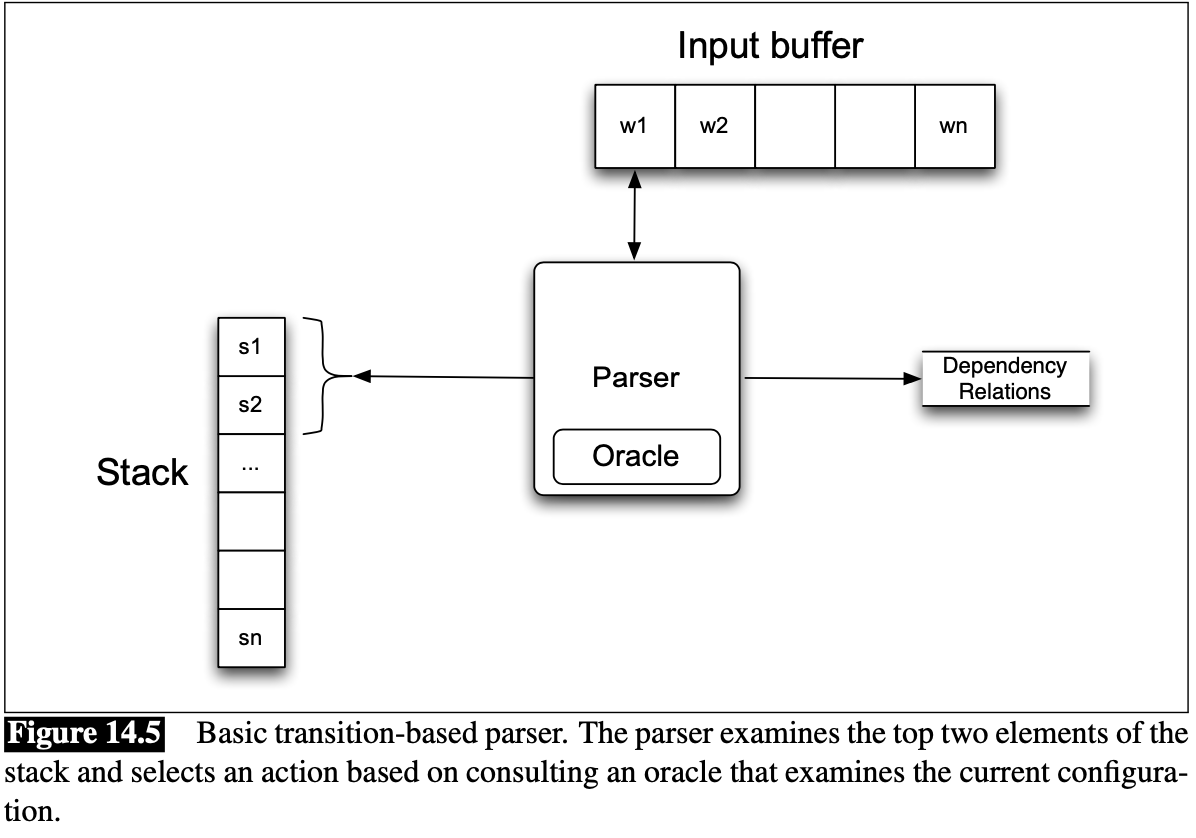


- Based on "Shift-Reduce" Parsing replacing *reduce* with asserting dependency relations between the word at the top of the stack and the word below it, or vice versa.
- A key element in transition-based parsing is the notion of a __configuration__ which consists of a __stack__, an __input buffer of words__, or tokens, and a __set of relations__ representing a dependency tree. 
- The parsing process consists of a sequence of transitions through the space of possible configurations. 
- The goal of this process is to find a final configuration where all the words have been accounted for and an appropriate dependency tree has been synthesized.


- __Transitions__: produce a new configuration given current configuration
- __Parsing__ is the task of finding a sequence of transitions that leads from start state to desired goal state
- __Start State__
    - __Stack__ initialized with ROOT node
    - __Input Buffer__ initialized with words in sentence
    - __Dependency Relation Set__ is empty
- __End State__
    - __Stack__ and __Input Word__ lists are empty
    - Set of __dependency relations__ is a final parse

### Arc-Standard Transition System

(There are alternatives, i.e. Arc Eager)

Defines 3 transition operators that will operate on the top two elements of the stack:

- __LEFTARC__: 
    - Assert a head-dependent relation between the word at the top of the stack and the word directly beneath it;
    - Remove the lower word from the stack.
- __RIGHTARC__: 
    - Assert a head-dependent relation between the second word on the stack and the word at the top; 
    - Remove the word at the top of the stack;
- __SHIFT__: 
    - Remove the word from the front of the input buffer and push it onto the stack.

__Preconditions__:
- ROOT cannot have incoming arcs
- LEFTARC cannot be applied when ROOT is the 2nd element in stack
- LEFTARC and RIGHTARC require 2 elements in stack to be applied

- Assumes an __ORACLE__ that provides the correct transition operator to use given the current configuration. It then applies that operator to the current configuration, producing a new configuration

__Pseudocode__

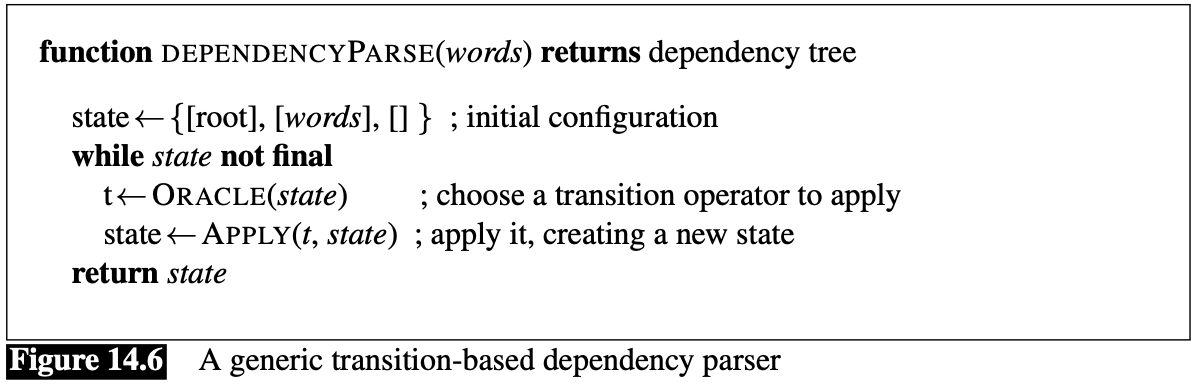

__Parsing Example__
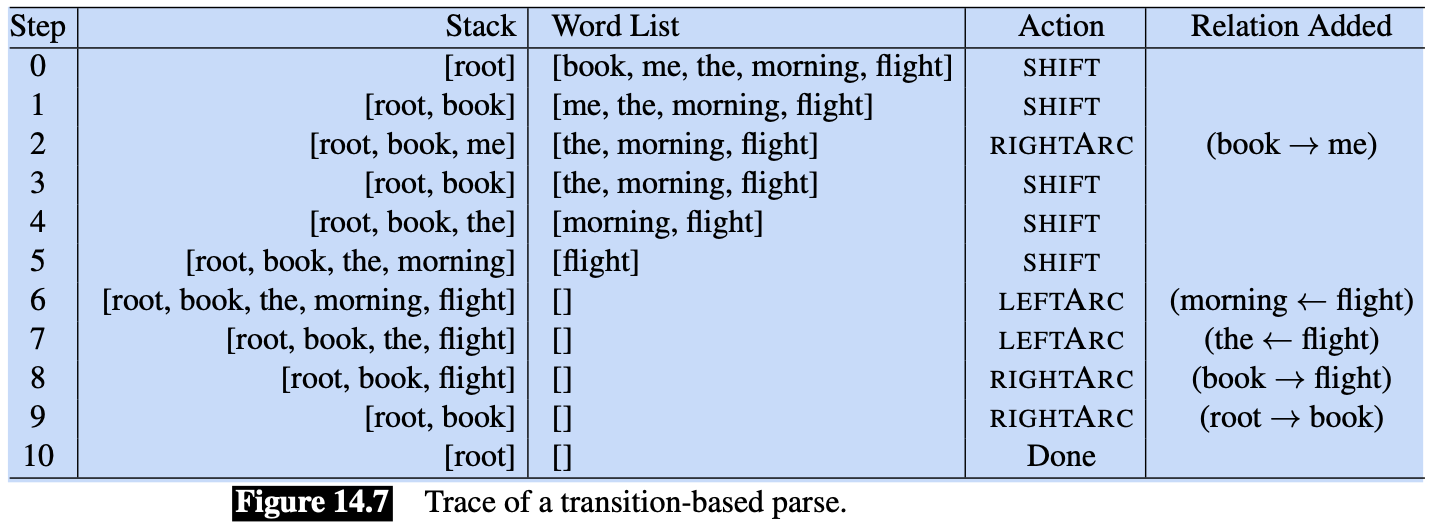

### ORACLE

The __ORACLE__ is a Machine Learning Model trained on treebank data, generated by simulating parsing (to generate training configurations).

- Each action is predicted by a discriminative classifier over each legal move
- Max of 3 untyped choices; max of |R| * 2 + 1 when typed
- Features: 
    - top of stack word, POS
    - first in buffer word, POS
    - etc.

### Transition Parser in NLTK

In [46]:
from nltk.parse.transitionparser import TransitionParser

tp = TransitionParser('arc-standard')
tp.train(dependency_treebank.parsed_sents()[:100], 'tp.model')
print(tp)

 Number of training examples : 100
 Number of valid (projective) examples : 100
[LibSVM]<nltk.parse.transitionparser.TransitionParser object at 0x7ff97cfcc6a0>


In [51]:
# parsing takes a list of dependency graphs and a model as arguments
parses = tp.parse(dependency_treebank.parsed_sents()[-10:], 'tp.model')
print(len(parses))

10


## Evaluation of Dependency Parsing

Dependency Parsing performance is evaluated as __labeled__ and __unlabeled attachment scores__ which are calculated as 

$$ UAS/LAS = \frac{\text{# of corrent dependency relations}}{\text{# of dependency relations}}$$

the difference between the two is whether the relation labels are considered or not.

NLTK provides `DependencyEvaluator` class to perform the evaluation, that takes predicted and reference parses as arguments. The evaluation ignores punctuation.

In [52]:
from nltk.parse import DependencyEvaluator

de = DependencyEvaluator(parses, dependency_treebank.parsed_sents()[-10:])
las, uas = de.eval()

# no labels, thus identical
print(las)
print(uas)

0.775
0.775


### Exercise
- Train `arc-standard` and `arc-eager` transition parsers on the same portion (slightly bigger than 100, otherwise it takes a lot of time)
- Evaluate both of them comparing the attachment scores

## Dependency Parsing with Stanza and Spacy

Both spaCy and Stanza (python package Stanford NLP Tools) provide pre-trained dependency parsing models.
The libraries are quite similar in usage.

- initialize pipeline (with other processing steps such as tokenization, POS-tagging)
- process a sentence 
- iterate over tokens accessing dependency parsing attributes

### Stanford Dependency Parser

[paper on stanza](https://arxiv.org/pdf/2003.07082.pdf)

A neural graph-based dependency parser. 
[paper on parser](https://nlp.stanford.edu/pubs/dozat2017deep.pdf)

> We implement a Bi-LSTM-based deep biaffine neural dependency parser (Dozat and Manning, 2017). We
further augment this model with two linguistically motivated features: one that predicts the linearization order of two words in a given language, and the other that predicts the typical distance in linear order between them.



### Spacy Dependency Parser

> A transition-based dependency parser component. The dependency parser jointly learns sentence segmentation and labelled dependency parsing, and can optionally learn to merge tokens that had been over-segmented by the tokenizer. The parser uses a variant of the non-monotonic arc-eager transition-system described by Honnibal and Johnson (2014), with the addition of a "break" transition to perform the sentence segmentation. Nivre (2005)’s pseudo-projective dependency transformation is used to allow the parser to predict non-projective parses.

> The parser is trained using an imitation learning objective. It follows the actions predicted by the current weights, and at each state, determines which actions are compatible with the optimal parse that could be reached from the current state. The weights are updated such that the scores assigned to the set of optimal actions is increased, while scores assigned to other actions are decreased. Note that more than one action may be optimal for a given state.

In [17]:
example = 'I saw the man with a telescope.'

In [19]:
# stanza example
import stanza

stanza_nlp = stanza.Pipeline(lang='en', processors='tokenize,pos,lemma,depparse')
stanza_doc = stanza_nlp(example)

for sent in stanza_doc.sentences:
    for word in sent.words:
        print("{}\t{}\t{}\t{}".format(word.id, word.text, word.head, word.deprel))


2021-04-13 09:18:34 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |
| lemma     | combined |
| depparse  | combined |

2021-04-13 09:18:34 INFO: Use device: cpu
2021-04-13 09:18:34 INFO: Loading: tokenize
2021-04-13 09:18:34 INFO: Loading: pos
2021-04-13 09:18:34 INFO: Loading: lemma
2021-04-13 09:18:34 INFO: Loading: depparse
2021-04-13 09:18:34 INFO: Done loading processors!


1	I	2	nsubj
2	saw	0	root
3	the	4	det
4	man	2	obj
5	with	7	case
6	a	7	det
7	telescope	2	obl
8	.	2	punct


In [16]:
# spacy example
import spacy

spacy_nlp = spacy.load('en')
spacy_doc = spacy_nlp(example)

for sent in spacy_doc.sents:
    for token in sent:
        print("{}\t{}\t{}\t{}".format(token.i, token.text, token.head, token.dep_))

0	I	saw	nsubj
1	saw	saw	ROOT
2	the	man	det
3	man	saw	dobj
4	with	saw	prep
5	a	telescope	det
6	telescope	with	pobj
7	.	saw	punct


## Assignment: Working with Dependency Graphs (Parses)

The objective of the assignment is to learn how to work with dependency graphs by defining functions.

Read [spaCy documentation on dependency parser](https://spacy.io/api/dependencyparser) to learn provided methods.

Define functions to:
- expract a path of dependency relations from the ROOT to a token
- extract subtree of a dependents given a token
- check if a given list of tokens (segment of a sentence) forms a subtree
- identify head of a span, given its tokens
- extract sentence subject, direct object and indirect object spans

## Assignment: Training Transition-Based Dependency Parser (Optional & Advanced)

- Modify [NLTK Transition parser](https://github.com/nltk/nltk/blob/develop/nltk/parse/transitionparser.py)'s `Configuration` class to use better features.
- Evaluate the features comparing performance to the original
- Replace `SVM` classifier with an alternative of your choice.